In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

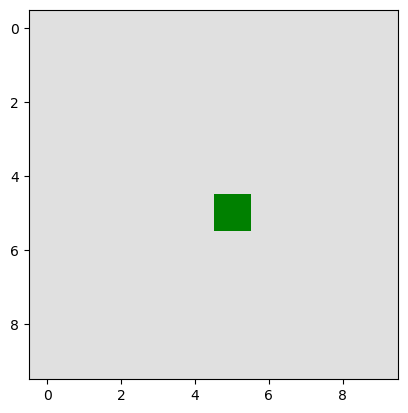

In [6]:
arr=np.zeros((10,10))
arr[5,5]=1
my_colors = ['#E0E0E0', 'green']
cmap = LinearSegmentedColormap.from_list('', my_colors, len(my_colors))
plt.imshow(arr,cmap=cmap)

In [38]:
def check_life(x,y):
    if x==1 and (y==2 or y==3):
        return 1
    elif x==0 and y==3:
        return 1
    else:
        return 0

class Gof:
    my_colors = ['#E0E0E0', 'green']
    cmap = LinearSegmentedColormap.from_list('', my_colors, len(my_colors))
    def __init__(self,N=10,M=10,filename=''):
        if filename!='':
            self.field=np.genfromtxt(filename).transpose()
            self.N, self.M=self.field.shape
        else:
            self.field=np.zeros((N,M))
            self.field[5,5]=1
            self.field[5,3]=1
            self.field[5,4]=1
            self.N=N
            self.M=M
        self.new_field=np.zeros(self.field.shape)
        self.sum=np.zeros(self.field.shape)
        self.check_status=np.vectorize(check_life)
    def display(self):
        plt.pause(0.3)
        plt.imshow(self.field,cmap=self.cmap)
    
    def evolve(self):
        for i in range(1,self.N-1):
            for j in range(1,self.M-1):
                sum=self.field[i-1,j]+self.field[i-1,j-1]\
                +self.field[i-1,j+1]+self.field[i,j-1]\
                +self.field[i,j+1]+self.field[i+1,j]\
                +self.field[i+1,j+1]+self.field[i+1,j-1]
                
                self.new_field[i,j]=check_life(self.field[i,j],sum)
        self.field, self.new_field = self.new_field, self.field
    
    def evolve2(self):
        
        self.sum[1:-1,1:-1]=self.field[:-2,1:-1]+self.field[2:,1:-1]\
        +self.field[1:-1,:-2]+self.field[1:-1,2:]\
        +self.field[:-2,:-2]+self.field[2:,2:]\
        +self.field[2:,:-2]+self.field[:-2,2:]
        
        self.new_field=self.check_status(self.field,self.sum)
        self.field, self.new_field = self.new_field, self.field

    
    def play(self,steps=3):
        for i in range(steps):    
            self.evolve()
            self.display()
        plt.show()

In [39]:
game=Gof()

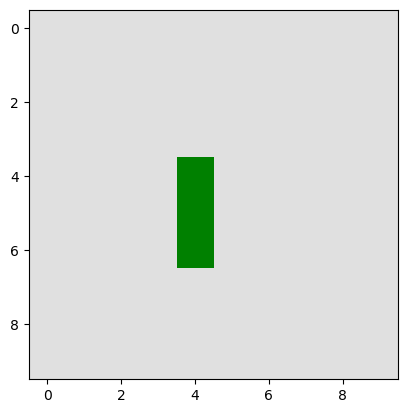

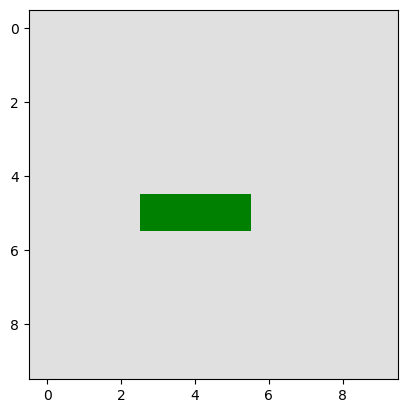

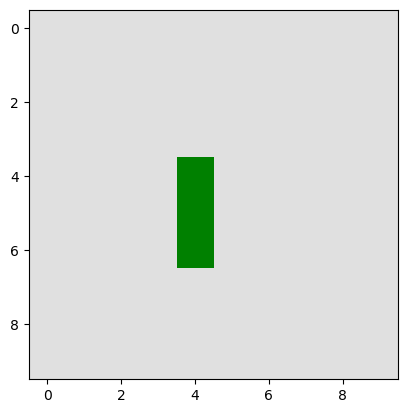

In [40]:
game.play()